# Python Data Analysis Series: Day 4!
## Page View Time Series Visualizer

<img src = https://techexec.com.au/wp-content/uploads/2021/07/getting-started-with-time-series-analysis.jpg width = "1000" height = "100" > 

### Today's Challenge:
In this project, we delve into the world of time series data visualization. Our task involves creating line charts, bar charts, and box plots to gain valuable insights from a dataset containing daily page views on the freeCodeCamp.org forum spanning from May 9, 2016, to December 3, 2019. Our visualizations will help us uncover patterns in visitor numbers and identify yearly and monthly growth trends.

### Key Data Analytics Objectives:
1. Create a line chart using Matplotlib to visualize daily page views with a title "Daily freeCodeCamp Forum Page Views 5/2016-12/2019."
2. Construct a bar chart that displays the average daily page views for each month grouped by year, providing valuable insights into monthly patterns.
3. Make a box plots using Seaborn to showcase data distribution within a given year or month and to compare trends over time.

### Dataset and Library:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


### Solution 1:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


As we can see, data type of date column is object. therefor we need to change it into date data type

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


After both of the column are in correct data type, now we remove outliers from value column and make new dataframe for a cleaned dataframe

In [4]:
#making date column as datetime
df['date'] = pd.to_datetime(df['date'])

df_new = df[(df["value"] >= df["value"].quantile(0.025))
& (df["value"] <= df["value"].quantile(0.975))]

#set date as index
df_line = df_new.set_index("date")

df_line

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


The data is ready! Now, we prepare the df_cat table, ready for visualization use

In [5]:
def draw_line_plot():
    plt.figure(figsize=(15,5))
    plt.plot(df_line.index,df_new["value"],color="red")
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.suptitle('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show

### Objective 1:

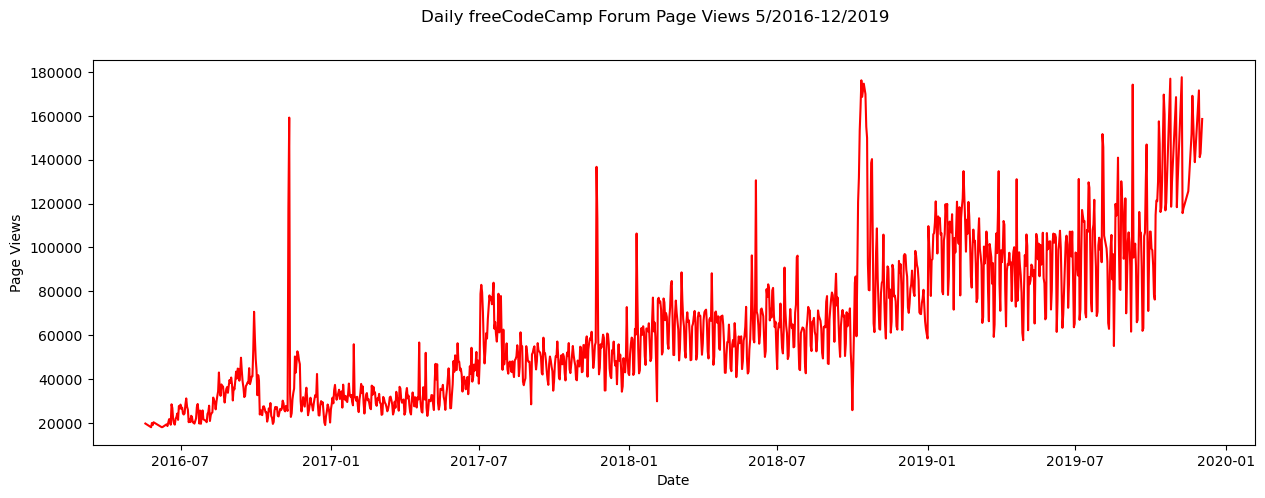

In [6]:
draw_line_plot()

### Insights 1:

##### As time progresses, there is an observable trend in the increasing fluctuation of page view values. Towards the end of each year, a substantial surge in page views is evident. In the broader context, this indicates a consistent and overall upward trajectory in page views over time

### Solution 2:

Preparing the dataframe ready for visualization use 

In [7]:
# copy the dataframe to a new one called df_bar 
df_bar = df_new.copy()

#separate day,month, and year into separate columns
df_bar['date'] = pd.to_datetime(df_bar["date"].dt.strftime('%Y-%m'))
df_bar['day'] = df_bar['date'].dt.day
df_bar['month'] = df_bar['date'].dt.month
df_bar['year'] = df_bar['date'].dt.year

#rearrange the column
new_cols = ["year","month","day","value"]
df_bar=df_bar[new_cols]

#group the column based on year and month
df_bar_group = (df_bar.groupby(['year','month']))
df_bar_1 = df_bar_group.mean().round(1)

#reset index
df_bar_1.reset_index(inplace=True)

#replace month number into month name
df_bar_1['month'] = df_bar_1['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                            ['January','February','March',
                                             'April','May','June','July',
                                             'August','September','October',
                                             'November','December'])



#we add january until april to month column 
#so number of months in each year is the same
new = {"year":[2016, 2016, 2016,2016],
        "month":["January","February","March","April"],
        "value": [0,0,0,0]}

new_df = pd.DataFrame(new,index=[44,45,46,47])

df_bar = pd.concat([new_df,df_bar_1])

df_bar.reset_index(inplace = True)

#delete the index and day columns since they are not needed.
del df_bar["index"]
del df_bar["day"]

In [8]:
df_bar.head(12)

,year,month,value
0,2016,January,0.0
1,2016,February,0.0
2,2016,March,0.0
3,2016,April,0.0
4,2016,May,19432.4
5,2016,June,21875.1
6,2016,July,24109.7
7,2016,August,31049.2
8,2016,September,41476.9
9,2016,October,27398.3


The dataframe is all set! Let's start plotting the bar graph

In [9]:
def draw_bars_plot():
    # set width of bar
    barWidth = 0.04
    fig = plt.subplots(figsize =(10, 8))

    # set height of bar
    January = df_bar['value'][df_bar['month']== "January"]
    February = df_bar['value'][df_bar['month']== "February"]
    March = df_bar['value'][df_bar['month']== "March"]
    April = df_bar['value'][df_bar['month']== "April"]
    May = df_bar['value'][df_bar['month']== "May"]
    June = df_bar['value'][df_bar['month']== "June"]
    July = df_bar['value'][df_bar['month']== "July"]
    August = df_bar['value'][df_bar['month']== "August"]
    September = df_bar['value'][df_bar['month']== "September"]
    October = df_bar['value'][df_bar['month']== "October"]
    November = df_bar['value'][df_bar['month']== "November"]
    December = df_bar['value'][df_bar['month']== "December"]
    
    # Set position of bar on X axis
    br1 = np.arange(len(January))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3] 
    br5 = [x + barWidth for x in br4]
    br6 = [x + barWidth for x in br5]    
    br7 = [x + barWidth for x in br6] 
    br8 = [x + barWidth for x in br7]
    br9 = [x + barWidth for x in br8]
    br10 = [x + barWidth for x in br9] 
    br11 = [x + barWidth for x in br10]
    br12 = [x + barWidth for x in br11] 
    


    # Make the plot
    plt.bar(br1, January, width = barWidth
            , label ='January')
    plt.bar(br2, February, width = barWidth,
            label ='February')
    plt.bar(br3, March, width = barWidth,
            label ='March')
    plt.bar(br4, April, width = barWidth,
            label ='April')
    plt.bar(br5, May, width = barWidth,
            label ='May')
    plt.bar(br6, June, width = barWidth,
            label ='June')
    plt.bar(br7, July, width = barWidth,
            label ='July')
    plt.bar(br8, August, width = barWidth,
            label ='August')
    plt.bar(br9, September, width = barWidth,
            label ='September')
    plt.bar(br10, October, width = barWidth,
            label ='October')
    plt.bar(br11, November, width = barWidth,
            label ='November')
    plt.bar(br12, December, width = barWidth,
            label ='December')

    # the label locations
    r = np.arange(len(January))
    
    # Adding Xticks
    plt.xlabel('Years', fontsize = 12)
    plt.ylabel('Average Page Views', fontsize = 12)
    plt.xticks(r + 0.22, ['2016', '2017', '2018', '2019'])

    plt.legend(title='Months')
    plt.show()

### Objective 2:

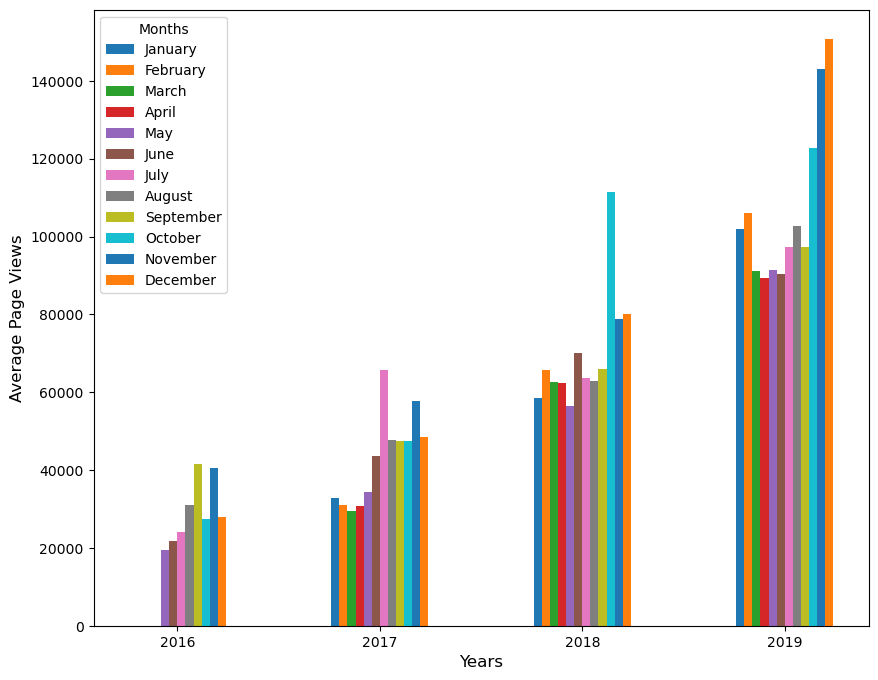

In [10]:
draw_bars_plot()

### Insights 2:

##### As depicted in the graph, each year demonstrates a remarkable and progressively substantial increase. The widening gap between the data points results in a substantial divergence by the end of 2019 and the middle of 2016, with an approximate 600% increment. This trend highlights the substantial growth over time, emphasizing the dynamic evolution of our dataset

### Solution 3:

As with the previous two solutions, we begin by preparing the data for visualization purpose

In [11]:
df_box = df_new.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.rename(
    columns={"value": "Page Views", "month": "Month", "year": "Year"},
    inplace=True)

del df_box["index"]

df_box

,date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


The dataframe is fully prepared! Now, let's proceed with creating the box plot

In [12]:
def draw_box_plot1():
    fig = plt.figure(figsize =(4.5, 3.5))
    sns.boxplot(df_box, x='Year',
                y='Page Views').set(title='Year-wise Box Plot (Trend)')
    
def draw_box_plot2():
    fig = plt.figure(figsize =(4.5, 3.5))
    sns.boxplot(df_box, x='Month',
                order = ["Jan",
                         "Feb",
                         "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
                y='Page Views').set(title='Month-wise Box Plot (Seasonality)')
    
def draw_box_plot():
    draw_box_plot1()
    draw_box_plot2()

### Objective 3:

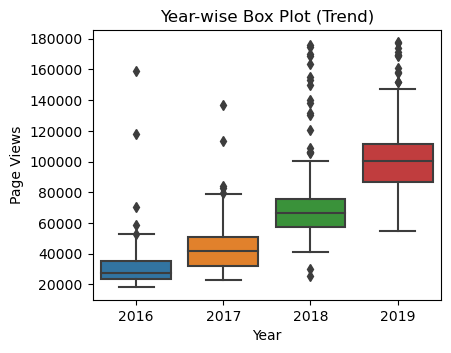

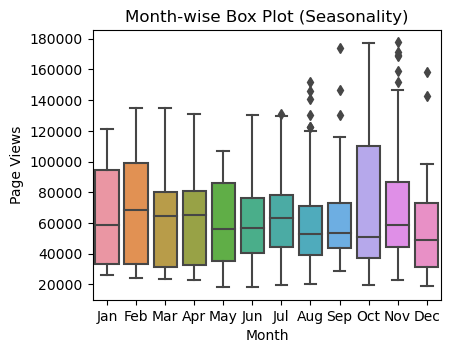

In [13]:
draw_box_plot()

### Insights 3:

#### 1. In the year-wise box plot, the Interquartile Range (IQR) exhibits a gradual, though steady, increase over time, without any prominent disparities. In contrast, the month-wise box plot (seasonality) depicts IQR gaps that fluctuate across months.
#### 2. A closer examination of the year-wise box plot reveals the presence of several outliers for each year. Notably, in the month-wise box plot (seasonality), the outliers are primarily concentrated in the latter half of the year, with the exception of October, where the extremes, both upper and lower, are notably extensive.